In [ ]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# main classes and functions
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, BasicAer, execute

# visualization stuff
from qiskit.visualization import (plot_histogram, plot_bloch_multivector,
                                  plot_state_city, plot_state_hinton,
                                  plot_state_qsphere,
                                  plot_state_paulivec,
                                  plot_bloch_multivector,
                                  plot_bloch_vector,
                                  plot_gate_map,
                                  plot_error_map)


# gates
from qiskit.circuit.library import CXGate, MCMT, XGate

# quantum info theory stuff
from qiskit.quantum_info import Operator, Statevector, state_fidelity, process_fidelity, average_gate_fidelity

# other tools
from qiskit.tools import job_monitor
from qiskit import IBMQ

In [4]:
#Auxiliary functions:

In [5]:
def show_figure(fig):
    '''
    auxiliar function to display plot 
    even if it's not the last command of the cell
    from: https://github.com/Qiskit/qiskit-terra/issues/1682
    '''
    
    new_fig = plt.figure()
    new_mngr = new_fig.canvas.manager
    new_mngr.canvas.figure = fig
    fig.set_canvas(new_mngr.canvas)
    plt.show(fig)

In [6]:
def test_circuit_qasm(qc):
    ''' 
    auxiliar function, used to run a given quantum circuit with the qasm simulator.
    measurement is added in this function, so you must pass a circuit
    with no classical registers and measurements.
    '''
    
    qc.measure_all()

    #################################

    backend = Aer.get_backend("qasm_simulator")

    job = execute(qc, backend, shots=1e5, seed_simulator=42)
    results = job.result()
    counts = results.get_counts()

    return plot_histogram(counts, title="Results", figsize=(12, 4))

In [7]:
def test_circuit_sv(qc, print_stuff=True):
    ''' 
    auxiliar function, used to run a given quantum circuit with the statevector simulator.
    it optinally prints the state vector components and respective probabilities.
    '''

    backend = Aer.get_backend("statevector_simulator")

    job = execute(qc, backend, seed_simulator=42)
    results = job.result()
    counts = results.get_counts()
    
    if print_stuff:
        sv = results.data(0)['statevector']
        probs = sv**2

        print(f"Statevector:\t{sv}\n")
        print(f"Probabilities:\t{probs}")

    return plot_histogram(counts, title="Results", figsize=(12, 4))


In [8]:
#1) Which statement will create a quantum circuit with four quantum bits and four classical bits?
# 1 - A)

qc = QuantumCircuit(4, 4)

qc.qregs, qc.cregs

([QuantumRegister(4, 'q')], [ClassicalRegister(4, 'c')])

In [12]:
2) Given this code fragment, what is the probability that a measurement would result in $\left | 0 \right \rangle$ ?
qc = QuantumCircuit(1)
qc.ry(3 * math.pi/4, 0)

Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/compilerop.py", line 101, in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  File "/tmp/ipykernel_59/2428387079.py", line 1
    2) Given this code fragment, what is the probability that a measurement would result in $\left | 0 \right \rangle$ ?
     ^
SyntaxError: unmatched ')'

Use %tb to get the full traceback.


Statevector:	[0.38268343+0.j 0.92387953+0.j]

Probabilities:	[0.14644661+0.j 0.85355339+0.j]


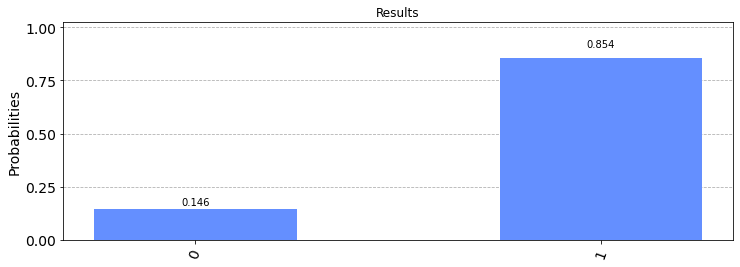

In [10]:
# 2 - C)

qc = QuantumCircuit(1)

qc.ry(3*np.pi/4, 0)

test_circuit_sv(qc)

In [ ]:
3) Assuming the fragment below, which three code fragments would produce the circuit illustrated?
inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
qc = QuantumCircuit(inp_reg, ancilla)

# Insert code here
(See picture in the sample test pdf!)

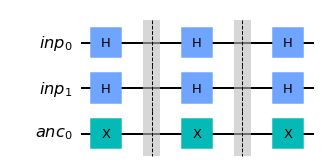

In [15]:
# 3 - A), B) & D) are possible

inp_reg = QuantumRegister(2, name="inp")
ancilla = QuantumRegister(1, name="anc")

qc = QuantumCircuit(inp_reg, ancilla)

qc.h(inp_reg)
qc.x(ancilla)

qc.barrier()

qc.h(inp_reg[0])
qc.h(inp_reg[1])
qc.x(ancilla)

qc.barrier()

qc.h(inp_reg[0:2])
qc.x(ancilla[0])

qc.draw("mpl")


In [ ]:
4) Given an empty QuantumCircuit object, qc, with three qubits and three classical bits, which one of these code fragments would create this circuit?
(See picture in the sample test pdf!)

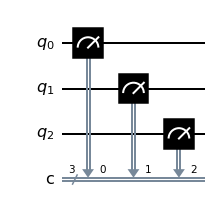

In [16]:
# 4 - A)

inp = QuantumRegister(3, name="q")
meas = ClassicalRegister(3, name="c")

qc = QuantumCircuit(inp, meas)

# # this would also be possible, but it's not in options
# qc.measure(inp, meas)

qc.measure([0, 1, 2], [0, 1, 2])

qc.draw("mpl")

In [ ]:
5) Which code fragment will produce a maximally entangled, or Bell, state?

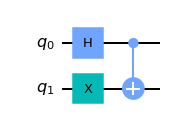

Statevector:	[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]

Probabilities:	[0. +0.j 0.5+0.j 0.5+0.j 0. +0.j]


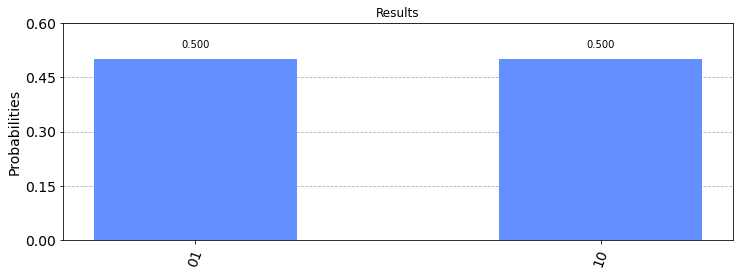

In [17]:
# 5 - A)

bell = QuantumCircuit(2)

# this makes |01> + |10>
bell.h(0)
bell.x(1)
bell.cx(0, 1)

show_figure(bell.draw("mpl"))
test_circuit_sv(bell)

In [18]:
6) Given this code, which two inserted code fragments result in the state vector represented by this Bloch sphere?
qc = QuantumCircuit(1,1)
# Insert code fragment here

simulator = Aer.get_backend('statevector_simulator')
job = execute(qc, simulator)
result = job.result()
outputstate = result.get_statevector(qc)
plot_bloch_multivector(outputstate)
(See picture in the sample test pdf!)

Object `sphere` not found.


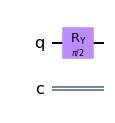


State:	[0.70710678+0.j 0.70710678+0.j]



/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


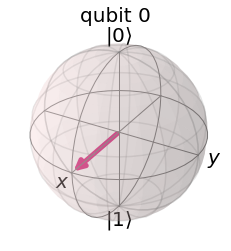

In [19]:
# 6 - A) & C)

qc = QuantumCircuit(1, 1)

# # both below are equivalent

# qc.h(0)
qc.ry(np.pi/2, 0)

show_figure(qc.draw("mpl"))

simulator = Aer.get_backend("statevector_simulator")
job = execute(qc, simulator)
results = job.result()

outputstate = results.get_statevector(qc)

print(f"\nState:\t{outputstate}\n")

plot_bloch_multivector(outputstate)

In [ ]:
7) S-gate is a Qiskit phase gate with what value of the phase parameter?

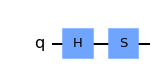


State:	[7.07106781e-01+0.j         4.32978028e-17+0.70710678j]



/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


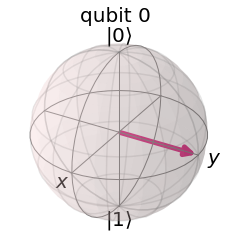

In [20]:
# 7 - B)

# S gate induces a pi/2 phase! (is a P gate with \theta = pi/2, i.e., it's a Rz gate with \theta = pi/2)
# tip: S = T^2, hence the "S" stands for "T Squared" (not sure if that's the actual reason for the name, but it's a mnemonic)

qc = QuantumCircuit(1)

qc.h(0)
qc.s(0)

show_figure(qc.draw("mpl"))

simulator = Aer.get_backend("statevector_simulator")
job = execute(qc, simulator)
results = job.result()

outputstate = results.get_statevector(qc)
print(f"\nState:\t{outputstate}\n")

plot_bloch_multivector(outputstate)

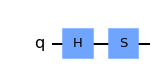


State:	Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))



/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


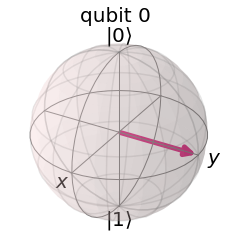

In [21]:
# another way to get the statevector, using the Statevector class

qc = QuantumCircuit(1)

qc.h(0)
qc.s(0)

show_figure(qc.draw("mpl"))

outputstate = Statevector.from_label("0").evolve(qc)

print(f"\nState:\t{outputstate}\n")

plot_bloch_multivector(outputstate)

In [ ]:
8) Which two code fragments, when inserted into the code below, will produce the statevector shown in the output?
from qiskit import QuantumCircuit, Aer, execute
from math import sqrt

qc = QuantumCircuit(2)

# Insert fragment here

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)
Output:

[0.707+0.j 0.+0.j 0.+0.j 0.707+0.j]

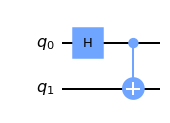


State:	[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]



In [22]:
# 8 - A), B)

qc = QuantumCircuit(2)

# # both options below work

# v = [1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]
# qc.initialize(v, [0, 1])

qc.h(0)
qc.cx(0, 1)

show_figure(qc.draw("mpl"))

simulator = Aer.get_backend("statevector_simulator")
result = execute(qc, simulator).result()
statevector = result.get_statevector(qc)

print(f"\nState:\t{statevector}\n")

In [ ]:
9) Which code fragment will produce a multi-qubit gate other than a CNOT ?

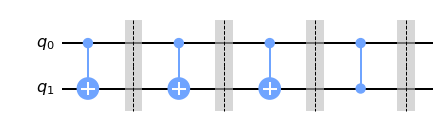

In [23]:
# 9 - D)

# notice how the first tree are equivalent to cnot
# the last one is the only multi-qubit gate OTHER THAN a cnot ;)

qc = QuantumCircuit(2)

################################

qc.cx(0, 1)
qc.barrier()

################################

qc.cnot(0, 1)
qc.barrier()

################################

# that's nice! multi-controlled x
qc.mct([0], 1)
qc.barrier()

################################

qc.cz(0, 1)
qc.barrier()

################################

qc.draw("mpl")

In [ ]:
10) Which code fragment will produce a multi-qubit gate other than a Toffoli?

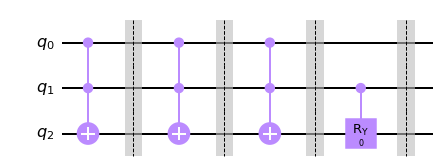

In [24]:
# 10 - D)

# notice how the first tree are equivalent to the toffoli gate
# the last one is the only multi-qubit gate OTHER THAN a toffoli ;)

qc = QuantumCircuit(3)

################################

qc.ccx(0, 1, 2)
qc.barrier()

################################

qc.mct([0, 1], 2)
qc.barrier()

################################

# very nice construction!

ccx = CXGate().control()
qc.append(ccx, [0, 1, 2])

qc.barrier()

################################

qc.cry(0, 1, 2)
qc.barrier()

################################

qc.draw("mpl")


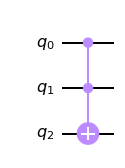

In [25]:
# another nice way to do toffoli

qc = QuantumCircuit(3)

mct = MCMT(gate='x', num_ctrl_qubits = 2, num_target_qubits = 1)

qc.append(mct, [0,1,2]) 

qc = qc.decompose()

qc.draw("mpl")

In [ ]:
11) Which two options would place a barrier across all qubits to the QuantumCircuit below?
qc = QuantumCircuit(3,3)

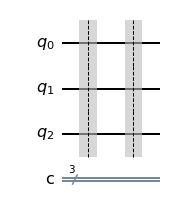

In [26]:
# 11 - B) & C)

qc = QuantumCircuit(3, 3)

qc.barrier()

qc.barrier([0, 1, 2])

qc.draw("mpl")

In [ ]:
12) What code fragment codes the equivalent circuit if you remove the barrier in the following QuantumCircuit?
(See picture in the sample test pdf!)

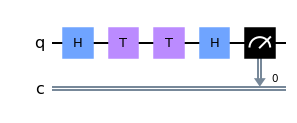


Since S = T^2, the circuit above is equivalent to:


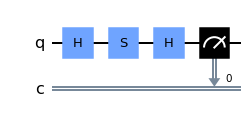

In [27]:
# 12 - A)

qc = QuantumCircuit(1, 1)

qc.h(0)
qc.t(0)

qc.t(0)
qc.h(0)

qc.measure(0, 0)

show_figure(qc.draw("mpl"))

print("\nSince S = T^2, the circuit above is equivalent to:")

qc = QuantumCircuit(1, 1)

qc.h(0)
qc.s(0)
qc.h(0)

qc.measure(0, 0)

show_figure(qc.draw("mpl"))


In [ ]:
13) Given the following code, what is the depth of the circuit?
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.barrier(0)
qc.cx(0,1)
qc.barrier([0,1])


Depth of the circuit: 2


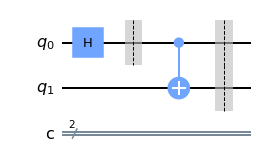

In [28]:
# 13 - A)

qc = QuantumCircuit(2, 2)

qc.h(0)
qc.barrier(0)

qc.cx(0, 1)
qc.barrier([0, 1])

# take a look in the docstring!
print(f"\nDepth of the circuit: {qc.depth()}")

qc.draw("mpl")

In [ ]:
14) Which code snippet would execute a circuit given these parameters?
1) Measure the circuit 1024 times,
2) use the QASM simulator,
3) and use a coupling map that connects three qubits linearly
qc = QuantumCircuit(3)

# Insert code fragment here
result = job.result()

In [29]:
# 14 - A)

qc = QuantumCircuit(3)

qasm_sim = Aer.get_backend("qasm_simulator")

# coupling map connecting 3 qubits linearly
couple_map = [[0, 1], [1, 2]]

job = execute(qc, qasm_sim, shots=1024, coupling_map=couple_map)

result = job.result()

In [30]:
result

Result(backend_name='qasm_simulator', backend_version='0.9.1', qobj_id='9a0e7233-b460-4510-b1ad-8198409361bf', job_id='fe8dea86-f705-4e25-b167-febaac264f54', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(), header=QobjExperimentHeader(clbit_labels=[], creg_sizes=[], global_phase=0.0, memory_slots=0, metadata=None, n_qubits=3, name='circuit-232', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=448953528, metadata={'parallel_state_update': 8, 'noise': 'ideal', 'measure_sampling': True, 'device': 'CPU', 'num_qubits': 0, 'parallel_shots': 1, 'remapped_qubits': False, 'method': 'stabilizer', 'active_input_qubits': [], 'num_clbits': 0, 'input_qubit_map': [], 'fusion': {'enabled': False}}, time_taken=0.00010559600000000001)], date=2021-11-25T10:08:46.579026, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='0.9.1'), metadata={'time_taken': 0.0004609590

In [ ]:
15) Which of these would execute a circuit on a set of qubits which are coupled in a custom way?
from qiskit import QuantumCircuit, execute, BasicAer
backend = BasicAer.get_backend('qasm_simulator')
qc = QuantumCircuit(3)

# insert code here

In [31]:
# 15 - A)

backend = BasicAer.get_backend("qasm_simulator")

qc = QuantumCircuit(3)

execute(qc, backend, shots=1024, coupling_map=[[0, 1], [1, 2]])

No classical registers in circuit "circuit-235", counts will be empty.


In [ ]:
16) Which three simulators are available in BasicAer?

In [32]:
# 16 - A), C) & D)

# answer here: https://qiskit.org/documentation/apidoc/providers_basicaer.html#simulators

qasm = BasicAer.get_backend("qasm_simulator")

sv = BasicAer.get_backend("statevector_simulator")

unitary = BasicAer.get_backend("unitary_simulator")

In [ ]:
17) Which line of code would assign a statevector simulator object to the variable backend?

In [ ]:
# 17 - B)

backend = BasicAer.get_backend("statevector_simulator")



In [ ]:
18) Which code fragment would yield an operator that represents a single-qubit X gate?

In [33]:
# 18 - C)

# info: https://qiskit.org/documentation/stubs/qiskit.quantum_info.Operator.html

# # i think the following is possible:
# op = Operator([[0, 1], [1, 0]])

qc = QuantumCircuit(1)

qc.x(0)

op = Operator(qc)

op

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [ ]:
19) What would be the fidelity result(s) for these two operators, which differ only by global phase?
op_a = Operator(XGate())
op_b = numpy.exp(1j * 0.5) * Operator(XGate())

In [34]:
# 19 - C)

# info here: https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html#Process-Fidelity
# namely:
# "We may also compare operators using the process_fidelity function from the Quantum Information module.
# This is an information theoretic quantity for how close two quantum channels are to each other,
# and in the case of unitary operators it does not depend on global phase."

op_a = Operator(XGate())
op_b = np.exp(1j * 0.5) * Operator(XGate())

pF = process_fidelity(op_a, op_b)

print(f'\nProcess fidelity pF = {pF}')

agF = average_gate_fidelity(op_a, op_b)

print(f'\nAverage gate fidelity agF = {agF}')

# # code below returns an error, because, of course, op_a and op_b are not states,
# # but operators (processes, gates)

# sF = state_fidelity(op_a, op_b)

# print(f'\nState fidelity sF = {sF}')


Process fidelity pF = 1.0

Average gate fidelity agF = 1.0


In [ ]:
20) Given this code fragment, which output fits most closely with the measurement probability distribution?
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.measure([0,1], [0,1])
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1000).result()
counts = result.get_counts(qc)
print(counts)

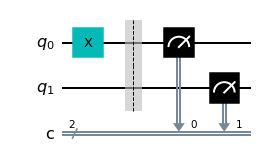

{'01': 1000}


In [35]:
# 20 - B)

# BE VERY CAREFUL WITH THE ENDIANNESS!!!

qc = QuantumCircuit(2, 2)

qc.x(0)

# better to visualize order of measurements
qc.barrier()

qc.measure([0, 1], [0, 1])

show_figure(qc.draw("mpl"))

simulator = Aer.get_backend("qasm_simulator")
result = execute(qc, simulator, shots=1000).result()
counts = result.get_counts(qc)

print(counts)

In [ ]:
Further explorations
Some other points to be addressed. They were not explicitly covered in the sample exam, but are topics relevant to the actual exam, according to the study guide and "Section" available here.

Implement QASM

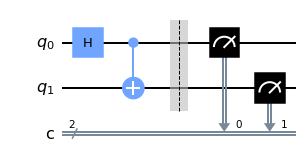

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
barrier q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
barrier q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];

None


In [36]:
# openqasm string

qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cnot(0, 1)

qc.barrier()

qc.measure([0, 1], [0, 1])

####################################

show_figure(qc.draw("mpl"))

####################################

print(qc.qasm())

print("\n")

print(qc.qasm(formatted=True))

In [38]:
qasm_str = qc.qasm(filename="qasm_test")

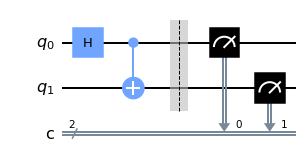

In [39]:
qc_test_str = QuantumCircuit.from_qasm_str(qasm_str)

qc_test_str.draw("mpl")

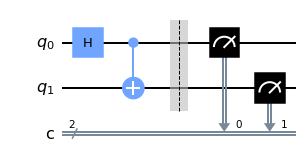

In [40]:
qc_test_file = QuantumCircuit.from_qasm_file("qasm_test")

qc_test_file.draw("mpl")

In [ ]:
Unitary simulator backend

In [41]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cnot(0, 1)

qc.barrier()

##########################

backend = Aer.get_backend("unitary_simulator")

unitary = execute(qc, backend).result().get_unitary()

unitary

array([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j]])

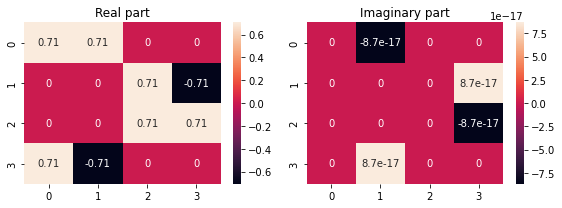

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

sns.heatmap(np.real(unitary), annot=True, ax=ax[0])
ax[0].set_title("Real part")

sns.heatmap(np.imag(unitary), annot=True, ax=ax[1])
ax[1].set_title("Imaginary part")

plt.tight_layout()
plt.show()

In [ ]:
Gate from circuit

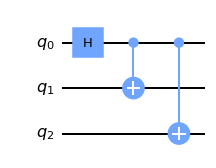

Statevector:

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


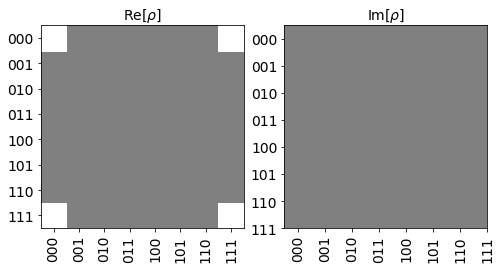

Gate in the circuit:


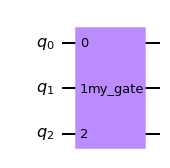

Decomposed gate in the circuit:


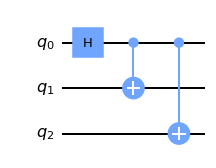

In [43]:
qc = QuantumCircuit(3)

qc.h(0)
qc.cnot(0, 1)
qc.cnot(0, 2)

show_figure(qc.draw("mpl"))

####################################

sv = Statevector.from_label("000")

sv = sv.evolve(qc)

print(f'Statevector:\n\n{sv.data}')

show_figure(plot_state_hinton(sv))

####################################

gate = qc.to_gate()

gate.name = "my_gate"

####################################

qc2 = QuantumCircuit(3)

qc2.append(gate, [0, 1, 2])

print("Gate in the circuit:")
show_figure(qc2.draw("mpl"))

print("Decomposed gate in the circuit:")
show_figure(qc2.decompose().draw("mpl"))


In [ ]:
Job monitoring

In [ ]:
# that's more useful when "backend" is a real hardware, of course
job = execute(qc, backend)
job_monitor(job)

In [ ]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

circ = bell.compose(meas)

In [ ]:
backend = Aer.get_backend("qasm_simulator")

job = execute(circ, backend, shots=1e5, seed_simulator=42)
results = job.result()
counts = results.get_counts()

plot_histogram(counts, title="Results", figsize=(6, 4))

In [ ]:
simulator = Aer.get_backend("statevector_simulator")

job = execute(bell, simulator)
results = job.result()

psi = results.get_statevector(bell)

print(psi)

In [ ]:
# "here we see that there is no information about the quantum state in the single qubit space as all vectors are zero."
# if it was a separable state, it would be shown!
show_figure(plot_bloch_multivector(psi))

show_figure(plot_state_city(psi))
show_figure(plot_state_hinton(psi))

show_figure(plot_state_qsphere(psi))